In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from minepy import MINE

import csv


In [2]:
'''定义两个差分方程https://skccm.readthedocs.io/en/latest/quick-example.html
论文Distinguishing time-delayed causal interactions using convergent cross mapping
'''
def coupled_logistic(rx1, rx2, b12, b21, time,ts_length):
    x1 = np.zeros(ts_length)
    x2 = np.zeros(ts_length)
    
    x1[0] = 0.2
    x2[0] = 0.4

    for i in range(ts_length-1):

        x1[i+1] = x1[i] * (rx1 - rx1 * x1[i] - b21 * x2[i])
        x2[i+1] = x2[i] * (rx2 - rx2 * x2[i] - b12 * x1[i-time])

    return x1,x2
#式中，time是x1对x2影响的时间延迟

获得时滞数据

In [3]:
rx1 = 3.78 #决定了x1序列的混沌行为
rx2 = 3.77 #determines chaotic behavior of the x2 series
b12 = 0.08 #Influence of x1 on x2
b21 = 0.07 #Influence of x2 on x1
time = 5#time是x1对x2影响的时间延迟
ts_length = 1000
x1,x2 = coupled_logistic(rx1,rx2,b12,b21,time,ts_length)

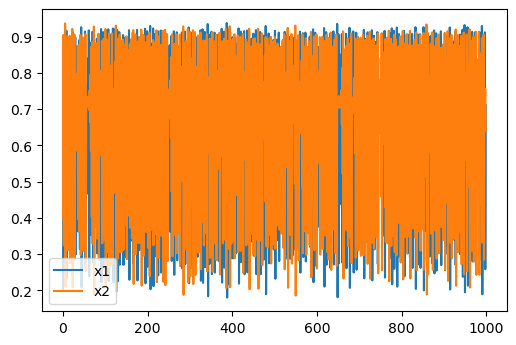

In [4]:
plt.figure(1,dpi=100)

plt.plot(x1,label = "x1")
plt.plot(x2,label = "x2")
plt.legend()
plt.show()

构建x1时间延迟数据集

In [5]:
#array改为dataframe
x_1 = pd.DataFrame(x1,columns=['x_1'])
x_2 = pd.DataFrame(x2,columns=['x_2'])
x_1.shape

(1000, 1)

In [6]:
x_2 = x_2.iloc[10:800,[0]]#原始数据
x_2 = x_2.reset_index(drop=True)#更改索引
x_2.columns=['x_2']#重命名列名
x_t = x_1.iloc[10:800,[0]]#原始数据
x_t = x_t.reset_index(drop=True)#更改索引
x_t.columns=['x_1']#重命名列名


x_t1 = x_1.iloc[9:799,[0]]
x_t1 = x_t1.reset_index(drop=True)#更改索引
x_t1.columns=['x_t1']#重命名列名

x_t2 = x_1.iloc[8:798,[0]]
x_t2 = x_t2.reset_index(drop=True)#更改索引
x_t2.columns=['x_t2']#重命名列名
x_t3 = x_1.iloc[7:797,[0]]
x_t3 = x_t3.reset_index(drop=True)#更改索引
x_t3.columns=['x_t3']#重命名列名
x_t4 = x_1.iloc[6:796,[0]]
x_t4 = x_t4.reset_index(drop=True)#更改索引
x_t4.columns=['x_t4']#重命名列名
x_t5 = x_1.iloc[5:795,[0]]
x_t5 = x_t5.reset_index(drop=True)#更改索引
x_t5.columns=['x_t5']#重命名列名
x_t6 = x_1.iloc[4:794,[0]]
x_t6 = x_t6.reset_index(drop=True)#更改索引
x_t6.columns=['x_t6']#重命名列名
x_t7 = x_1.iloc[3:793,[0]]
x_t7 = x_t7.reset_index(drop=True)#更改索引
x_t7.columns=['x_t7']#重命名列名
x_t8 = x_1.iloc[2:792,[0]]
x_t8 = x_t8.reset_index(drop=True)#更改索引
x_t8.columns=['x_t8']#重命名列名
x_t9 = x_1.iloc[1:791,[0]]
x_t9 = x_t9.reset_index(drop=True)#更改索引
x_t9.columns=['x_t9']#重命名列名
x_t10 = x_1.iloc[0:790,[0]]
x_t10 = x_t10.reset_index(drop=True)#更改索引
x_t10.columns=['x_t10']#重命名列名

data =  pd.concat([x_2,x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
                   x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

data

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
0,0.901444,0.670540,0.234197,0.916658,0.537247,0.823538,0.337911,0.889498,0.408160,0.869851,0.599200,0.200000
1,0.310570,0.792751,0.670540,0.234197,0.916658,0.537247,0.823538,0.337911,0.889498,0.408160,0.869851,0.599200
2,0.786757,0.603808,0.792751,0.670540,0.234197,0.916658,0.537247,0.823538,0.337911,0.889498,0.408160,0.869851
3,0.598680,0.871013,0.603808,0.792751,0.670540,0.234197,0.916658,0.537247,0.823538,0.337911,0.889498,0.408160
4,0.861886,0.388179,0.871013,0.603808,0.792751,0.670540,0.234197,0.916658,0.537247,0.823538,0.337911,0.889498
...,...,...,...,...,...,...,...,...,...,...,...,...
785,0.865284,0.293066,0.907401,0.448006,0.853921,0.619033,0.210368,0.925419,0.447818,0.842926,0.641619,0.763011
786,0.424897,0.765383,0.293066,0.907401,0.448006,0.853921,0.619033,0.210368,0.925419,0.447818,0.842926,0.641619
787,0.900193,0.656017,0.765383,0.293066,0.907401,0.448006,0.853921,0.619033,0.210368,0.925419,0.447818,0.842926
788,0.277221,0.811652,0.656017,0.765383,0.293066,0.907401,0.448006,0.853921,0.619033,0.210368,0.925419,0.447818


In [7]:
# x_2 = x_2.iloc[0:80,[0]]#原始数据
# x_t = x_1.iloc[0:80,[0]]#原始数据
# x_t1 = x_1.iloc[1:81,[0]]
# x_t1 = x_t1.reset_index(drop=True)#更改索引
# x_t1.columns=['x_t1']#重命名列名

# x_t2 = x_1.iloc[2:82,[0]]
# x_t2 = x_t2.reset_index(drop=True)#更改索引
# x_t2.columns=['x_t2']#重命名列名
# x_t3 = x_1.iloc[3:83,[0]]
# x_t3 = x_t3.reset_index(drop=True)#更改索引
# x_t3.columns=['x_t3']#重命名列名
# x_t4 = x_1.iloc[4:84,[0]]
# x_t4 = x_t4.reset_index(drop=True)#更改索引
# x_t4.columns=['x_t4']#重命名列名
# x_t5 = x_1.iloc[5:85,[0]]
# x_t5 = x_t5.reset_index(drop=True)#更改索引
# x_t5.columns=['x_t5']#重命名列名
# x_t6 = x_1.iloc[6:86,[0]]
# x_t6 = x_t6.reset_index(drop=True)#更改索引
# x_t6.columns=['x_t6']#重命名列名
# x_t7 = x_1.iloc[7:87,[0]]
# x_t7 = x_t7.reset_index(drop=True)#更改索引
# x_t7.columns=['x_t7']#重命名列名
# x_t8 = x_1.iloc[8:88,[0]]
# x_t8 = x_t8.reset_index(drop=True)#更改索引
# x_t8.columns=['x_t8']#重命名列名
# x_t9 = x_1.iloc[9:89,[0]]
# x_t9 = x_t9.reset_index(drop=True)#更改索引
# x_t9.columns=['x_t9']#重命名列名
# x_t10 = x_1.iloc[10:90,[0]]
# x_t10 = x_t10.reset_index(drop=True)#更改索引
# x_t10.columns=['x_t10']#重命名列名

# data =  pd.concat([x_2,x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
#                    x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

# data

相关性分析

In [8]:
#pearson相关系数
r = data.corr()
r

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,0.000219,-0.024393,0.028993,-0.043605,0.064180,-0.059469,0.089312,-0.157316,0.216624,-0.300331,0.360667
x_1,0.000219,1.000000,-0.701301,0.452713,-0.371488,0.212137,-0.106271,0.083130,-0.052694,0.016816,-0.025694,0.046169
x_t1,-0.024393,-0.701301,1.000000,-0.701913,0.452887,-0.372236,0.214315,-0.108074,0.085074,-0.054503,0.017244,-0.021786
x_t2,0.028993,0.452713,-0.701913,1.000000,-0.702195,0.453245,-0.372819,0.214796,-0.108811,0.085688,-0.054688,0.015963
x_t3,-0.043605,-0.371488,0.452887,-0.702195,1.000000,-0.702457,0.454317,-0.373551,0.215447,-0.109465,0.085821,-0.053290
x_t4,0.064180,0.212137,-0.372236,0.453245,-0.702457,1.000000,-0.702908,0.454580,-0.373868,0.215764,-0.109573,0.085082
x_t5,-0.059469,-0.106271,0.214315,-0.372819,0.454317,-0.702908,1.000000,-0.702816,0.454741,-0.373869,0.215969,-0.110030
x_t6,0.089312,0.083130,-0.108074,0.214796,-0.373551,0.454580,-0.702816,1.000000,-0.702894,0.454758,-0.374016,0.216108
x_t7,-0.157316,-0.052694,0.085074,-0.108811,0.215447,-0.373868,0.454741,-0.702894,1.000000,-0.702984,0.454799,-0.373367
x_t8,0.216624,0.016816,-0.054503,0.085688,-0.109465,0.215764,-0.373869,0.454758,-0.702984,1.000000,-0.703034,0.454463


In [9]:
#spearman秩相关
s = data.corr('spearman')
s

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,-0.002575,-0.018360,0.032133,-0.046553,0.060513,-0.066094,0.095422,-0.153842,0.224545,-0.314394,0.368214
x_1,-0.002575,1.000000,-0.783724,0.508193,-0.376253,0.226291,-0.108858,0.071912,-0.045127,0.018982,-0.023813,0.046709
x_t1,-0.018360,-0.783724,1.000000,-0.783767,0.507930,-0.376308,0.227492,-0.110305,0.073137,-0.046288,0.019582,-0.021668
x_t2,0.032133,0.508193,-0.783767,1.000000,-0.783492,0.507948,-0.377371,0.228810,-0.111393,0.074153,-0.046809,0.017639
x_t3,-0.046553,-0.376253,0.507930,-0.783492,1.000000,-0.783769,0.508677,-0.378158,0.229471,-0.111982,0.074416,-0.045916
x_t4,0.060513,0.226291,-0.376308,0.507948,-0.783769,1.000000,-0.784088,0.509172,-0.378590,0.229872,-0.112181,0.073776
x_t5,-0.066094,-0.108858,0.227492,-0.377371,0.508677,-0.784088,1.000000,-0.784093,0.509141,-0.378555,0.229883,-0.112396
x_t6,0.095422,0.071912,-0.110305,0.228810,-0.378158,0.509172,-0.784093,1.000000,-0.784043,0.509060,-0.378529,0.230229
x_t7,-0.153842,-0.045127,0.073137,-0.111393,0.229471,-0.378590,0.509141,-0.784043,1.000000,-0.784041,0.509036,-0.378271
x_t8,0.224545,0.018982,-0.046288,0.074153,-0.111982,0.229872,-0.378555,0.509060,-0.784041,1.000000,-0.784010,0.508717


In [10]:
#MIC最大信息系数
list(data)
MIC = []
for var1 in list(data):
        x = data[var1]
        y = data['x_2']
        mine = MINE(alpha = 0.6, c = 15)
        mine.compute_score(x, y)
        MIC.append(mine.mic())
        print(mine.mic())

1.0000000000000002
0.19123401386572933
0.18081921044200938
0.16253687596316113
0.1700375607939479
0.17184105544218406
0.2077010844081531
0.23423783951159752
0.25875400326879333
0.2672137127242187
0.2790046659335759
0.29050599624976675


In [11]:
rx2 = r.x_2.reset_index(drop=True)#更改索引
rx2 = rx2.iloc[1:12]
rx2 = rx2.reset_index(drop=True)

sx2 = s.x_2.reset_index(drop=True)#更改索引
sx2 = sx2.iloc[1:12]
sx2 = sx2.reset_index(drop=True)

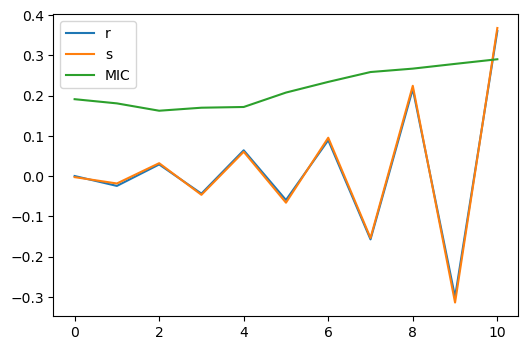

In [12]:
plt.figure(1,dpi=100)

plt.plot(rx2,label = "r")
plt.plot(sx2,label = "s")
plt.plot(MIC[1:12],label = "MIC")
plt.legend()
plt.show()